In [9]:
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

In [4]:
import requests
API_KEY = '941a5b3b4e01db404a977d6de881accb'

# Construct the request
headers = {'Authorization': f'Bearer {API_KEY}'}
response = requests.get('http://api.openweathermap.org/data/2.5/forecast?id=2660718&appid=941a5b3b4e01db404a977d6de881accb')

# Handle the response
if response.status_code == 200:
    data = response.json()
    # Process the data as needed
else:
    print(f'Error: {response.status_code}')

In [7]:
data['list'][0]

{'dt': 1712620800,
 'main': {'temp': 287.93,
  'feels_like': 287.32,
  'temp_min': 286.98,
  'temp_max': 287.93,
  'pressure': 1008,
  'sea_level': 1008,
  'grnd_level': 926,
  'humidity': 71,
  'temp_kf': 0.95},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'clouds': {'all': 41},
 'wind': {'speed': 2.93, 'deg': 244, 'gust': 6.46},
 'visibility': 10000,
 'pop': 0.03,
 'sys': {'pod': 'n'},
 'dt_txt': '2024-04-09 00:00:00'}

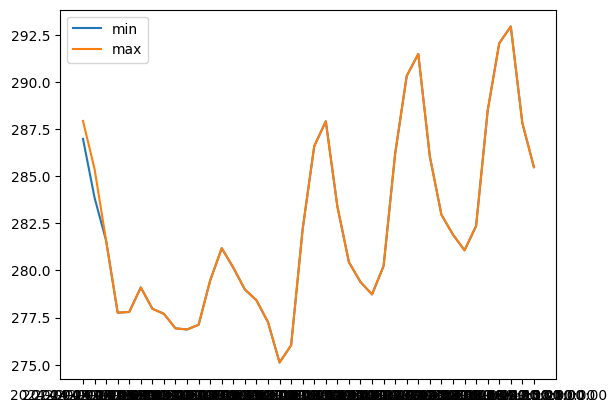

In [8]:
temp_min = [data['list'][i]['main']['temp_min'] for i in range(0, 40)]
temp_max = [data['list'][i]['main']['temp_max'] for i in range(0, 40)]
time = [data['list'][i]['dt_txt'] for i in range(0, 40)]
plt.plot(time, temp_min, label='min')
plt.plot(time, temp_max, label='max')
plt.legend()
plt.show()


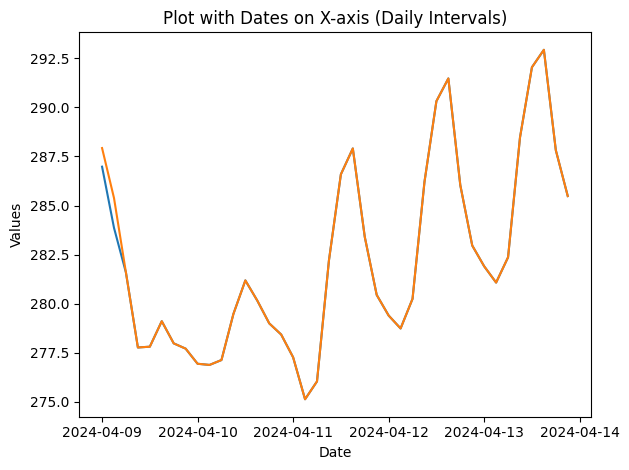

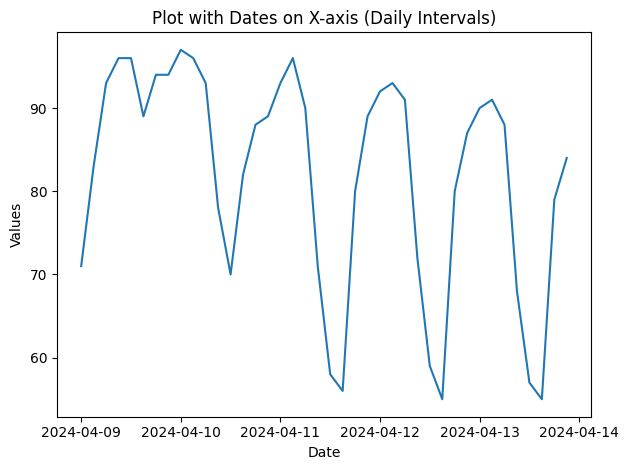

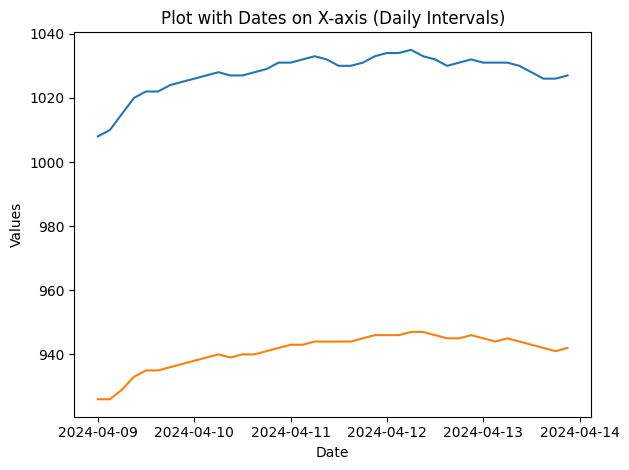

In [13]:
# Convert strings to datetime objects
time_datetime = [datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S') for time_str in time]

# Plotting
plt.plot(time_datetime, temp_min, label='min')
plt.plot(time_datetime, temp_max, label='max')

# Formatting x-axis date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as 'YYYY-MM-DD'
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set interval to display every day

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Plot with Dates on X-axis (Daily Intervals)')

plt.tight_layout()
plt.show()

#same with humidity
humidity = [data['list'][i]['main']['humidity'] for i in range(0, 40)]
plt.plot(time_datetime, humidity, label = 'humidity')
# Formatting x-axis date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as 'YYYY-MM-DD'
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set interval to display every day
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Plot with Dates on X-axis (Daily Intervals)')
plt.tight_layout()
plt.show()

#same with pressure
sea_level = [data['list'][i]['main']['sea_level'] for i in range(0, 40)]
grnd_level = [data['list'][i]['main']['grnd_level'] for i in range(0, 40)]
plt.plot(time_datetime, sea_level, label='sea level')
plt.plot(time_datetime, grnd_level, label='ground level')
# Formatting x-axis date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as 'YYYY-MM-DD'
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set interval to display every day
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Plot with Dates on X-axis (Daily Intervals)')

plt.tight_layout()
plt.show()


